<a href="https://colab.research.google.com/github/Eugenia27/AnalisisYCuracion/blob/master/AnalisisYCuracion_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISIS Y CURACIÓN DE DATOS 
##PRÁCTICO 1

*Ferraro, Ma. Eugenia y Trógolo, Nair*



# LIBRERÍAS Y AJUSTES GRÁFICOS

In [0]:
import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import cm
from matplotlib.ticker import NullFormatter
from matplotlib import rc
style.use('bmh')

In [0]:
rc('font',**{'size':14})
plt.rc('legend', **{'fontsize': 15}) 
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.size'] = 3
plt.rc('xtick', labelsize=14)    
plt.rc('ytick', labelsize=14) 


# EJERCICIO 1: Tablas de Crecimiento

In [11]:
url   = 'https://raw.githubusercontent.com/Eugenia27/AnalisisYCuracion/master/input/wtageinf.csv' 
pesos = pd.read_csv(url)
pesos.head(4)

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250


In [0]:
percentiles = pesos.columns[5:]

In [0]:
cmap = cm.get_cmap('Spectral')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


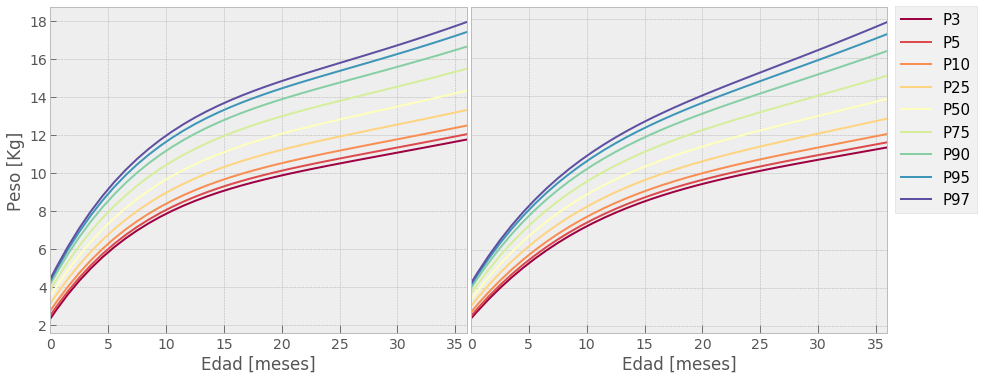

In [87]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
pesos[pesos.Sex==1].set_index('Agemos')[percentiles].plot(label='niños',ax=ax1,legend=False,cmap=cmap,lw=2)
plt.xlabel('Edad [meses]')
plt.ylabel('Peso [Kg]')

ax2 = fig.add_subplot(122)
pesos[pesos.Sex==2].set_index('Agemos')[percentiles].plot(label='niñas',ax=ax2,cmap=cmap,lw=2)
plt.legend(bbox_to_anchor=(0.999, 1.025),fancybox=False)
plt.xlabel('Edad [meses]')
ax2.yaxis.set_major_formatter(NullFormatter())
ax2.tick_params(left="off")


fig.subplots_adjust(wspace=0.01)

# EJERCICIO2: Pasos Fronterizos

In [119]:
url = 'https://raw.githubusercontent.com/Eugenia27/AnalisisYCuracion/master/input/pasos.json'
pasosFronterizos = pd.read_json(url)
pasosFronterizos.head(4)

,location,name,province
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra del Fuego
2,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA),Tierra del Fuego
3,"[-54.8019121, -68.3029511]",PUERTO USHUAIA,Tierra del Fuego


In [0]:
aeropuerto=pasosFronterizos.province.sort_values().unique()[0]
aeropuerto

In [0]:
pasosFronterizos.province=pasosFronterizos.province.str.replace(aeropuerto,'Aeropuerto PCNF')

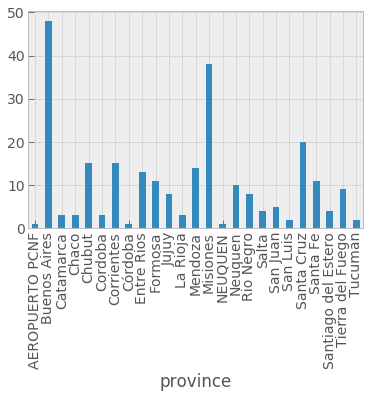

In [124]:
pasosFronterizos.groupby('province').province.count().plot(kind='bar')



In [123]:
pasosFronterizos.head()

,location,name,province
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra del Fuego
2,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA),Tierra del Fuego
3,"[-54.8019121, -68.3029511]",PUERTO USHUAIA,Tierra del Fuego
4,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS,Santa Cruz
